In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from concurrent.futures import ThreadPoolExecutor
import random
from PIL import Image, ImageOps
 


/mnt/data2/datasets_lfay/MedImageInsights/data/CheXpert-v1.0-512/images/train/patient21400/study4/view1_frontal.jpg


(-0.5, 623.5, 511.5, -0.5)

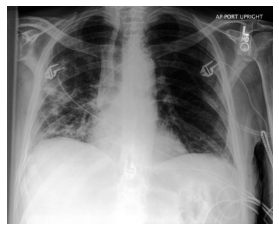

In [2]:
# load df

df = pd.read_csv('/mnt/data2/datasets_lfay/MedImageInsights/data/CheXpert-v1.0-512/val.csv')

df = df[df["Pneumonia"] == 1]

# get Path of first image
path = df.iloc[0]['Path']
path = '/mnt/data2/datasets_lfay/MedImageInsights/data' + path
print(path)

img = Image.open(path).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')


In [3]:
def chest_xray_augmentations(image, num_views=3):
    """
    Generate a specified number of augmented views for a chest X-ray image in parallel.

    Args:
        image (PIL.Image): Input chest X-ray image (grayscale).
        num_views (int): Number of augmented views to generate.

    Returns:
        List[PIL.Image]: A list of augmented views.
    """
    # Define shape-preserving augmentations
    augmentation_transforms = [
        transforms.RandomRotation(degrees=10, fill=0),  # Small rotation
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), fill=0),  # Translation
        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Brightness & contrast
        transforms.GaussianBlur(kernel_size=(5, 5)),  # Simulate blurring
        transforms.Lambda(lambda img: ImageOps.autocontrast(img)),  # Enhance contrast
    ]


    def apply_augmentation(_):
        # Randomly select and apply augmentations
        augment_pipeline = transforms.Compose(random.sample(augmentation_transforms, k=2))
        print(augment_pipeline)
        return augment_pipeline(image)

    # Use ThreadPoolExecutor for parallel augmentation
    with ThreadPoolExecutor() as executor:
        augmented_views = list(executor.map(apply_augmentation, range(num_views)))

    return augmented_views

In [4]:
augmented_views = chest_xray_augmentations(img)


Compose(
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    Lambda()
)
Compose(
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
)
Compose(
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
)


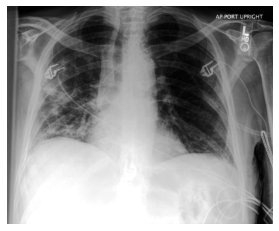

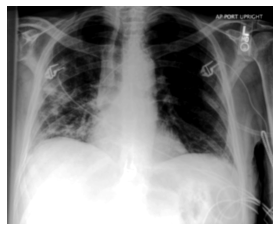

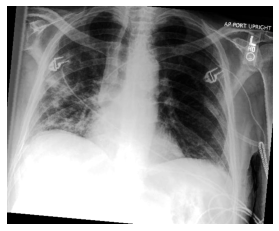

In [5]:
for i in range(3):
    plt.imshow(augmented_views[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
# load df
import os
PATH_TO_DATA = "/mnt/data2/datasets_lfay/MedImageInsights/data"
data_mimic = os.path.join(PATH_TO_DATA, "MIMIC-v1.0-512", "test.csv")
data_cheXpert = os.path.join(PATH_TO_DATA, "CheXpert-v1.0-512", "test.csv")
data_vindr = os.path.join(PATH_TO_DATA, "vindr-pcxr", "test.csv")
df_mimic = pd.read_csv(data_mimic)
df_chexpert = pd.read_csv(data_cheXpert)
df_vindr = pd.read_csv(data_vindr)


(-0.5, 1093.5, 1389.5, -0.5)

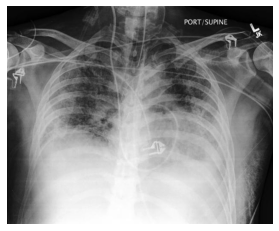

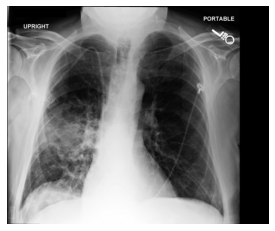

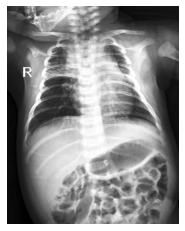

In [14]:

df_mimic_pneumonia = df_mimic[df_mimic["Pneumonia"] == 1]
df_chexpert_pneumonia = df_chexpert[df_chexpert["Pneumonia"] == 1]
df_vindr_pneumonia = df_vindr[df_vindr["Pneumonia"] == 1]
i = 0
# get Path of first image
path_chexpert = df_chexpert_pneumonia.iloc[i]['Path']
path_chexpert = PATH_TO_DATA + path_chexpert

path_mimic = df_mimic_pneumonia.iloc[i]['Path']
path_mimic = PATH_TO_DATA + path_mimic

path_vindr = df_vindr_pneumonia.iloc[i]['Path']
path_vindr = PATH_TO_DATA + path_vindr

img = Image.open(path_chexpert).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.figure()
img = Image.open(path_mimic).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.figure()
img = Image.open(path_vindr).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')



(-0.5, 1352.5, 1574.5, -0.5)

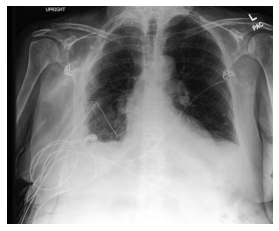

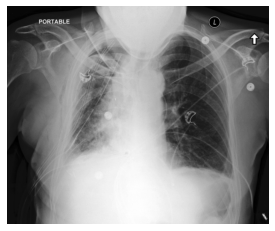

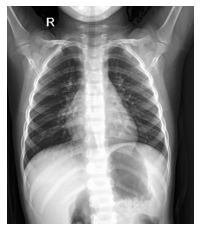

In [18]:

df_mimic_no = df_mimic[df_mimic["Pneumonia"] == 0]
df_chexpert_no = df_chexpert[df_chexpert["Pneumonia"] == 0]
df_vindr_no = df_vindr[df_vindr["Pneumonia"] == 0]

i = 4
# get Path of first image
path_chexpert = df_chexpert_no.iloc[i]['Path']
path_chexpert = PATH_TO_DATA + path_chexpert

path_mimic = df_mimic_no.iloc[i]['Path']
path_mimic = PATH_TO_DATA + path_mimic

path_vindr = df_vindr_no.iloc[i]['Path']
path_vindr = PATH_TO_DATA + path_vindr

img = Image.open(path_chexpert).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.figure()
img = Image.open(path_mimic).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.figure()
img = Image.open(path_vindr).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')


(-0.5, 623.5, 511.5, -0.5)

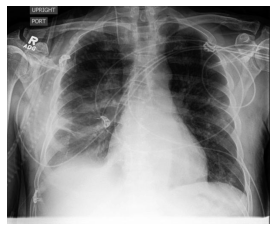

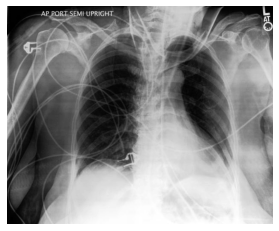

In [25]:
i = 20
# get Path of first image
path_chexpert = df_chexpert_no.iloc[i]['Path']
path_chexpert = PATH_TO_DATA + path_chexpert

img = Image.open(path_chexpert).convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')

i = 7
# get Path of first image
path_chexpert = df_chexpert_no.iloc[i]['Path']
path_chexpert = PATH_TO_DATA + path_chexpert

img = Image.open(path_chexpert).convert("L")
plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
